In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
g=9.81
m_s=50
rho=1.091
A=numpy.pi*0.5**2
v_e=325
C_D=0.15
m_p0=100
h0=0
v0=0
t0=0
dt=0.1
T=39
N = int(T/dt) + 1
t = numpy.linspace(0, T, N)
m_p=100


In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h=u[0]
    v=u[1]
    if t[n]<5 :
        return numpy.array([v,
                        -g + (20/(m_s+m_p)*v_e)-(1/2*rho*v*numpy.abs(v)*A*0.15/(m_s+m_p))])
    else :
        return numpy.array([v,
                        -g - 1/2*rho*v*numpy.abs(v)*A*0.15/(m_s+m_p)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
u = numpy.empty((N, 2))
u[0] = numpy.array([h0, v0])

In [6]:
for n in range(N-1):
    if m_p <=0 :
        m_p=0
    else : m_p=m_p0-20*t[n]
    if n==3.2/dt :
        print ("La masse de carburant après 3.2s est",m_p)
    u[n+1] = euler_step(u[n], f, dt)

La masse de carburant après 3.2s est 36.0


In [7]:
h=u[:,0]
v=u[:,1]

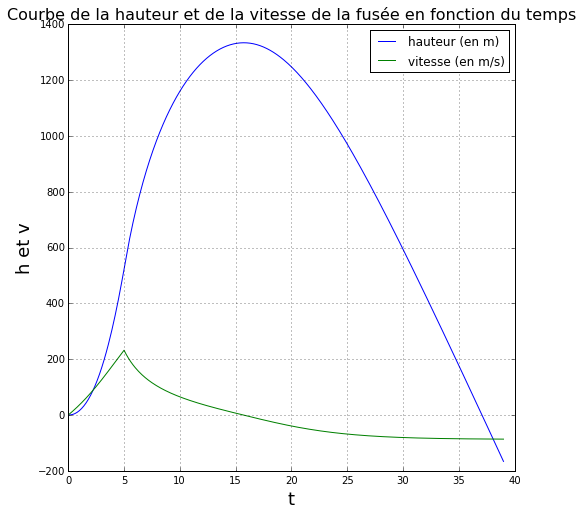

In [8]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h et v', fontsize=18)
pyplot.title('Courbe de la hauteur et de la vitesse de la fusée en fonction du temps', fontsize=16)
pyplot.plot(t,h)
pyplot.plot(t,v)
pyplot.legend(['hauteur (en m)','vitesse (en m/s)'])

In [9]:
print ("La vitesse maximale est",numpy.max(v),"m/s, après 5 s, à",u[int(5/dt),0])
for i in range (N-1):
    if max(h)==h[i]:
        t=i*dt
print("La hauteur maximale est",max(h),"m, après",t,"s")
i=100
while h[i]>0 :
    t=i*dt
    i=i+1
print("La fusée touche le sol après", t,"s, à la vitesse de",v[i],"m/s")

La vitesse maximale est 232.106133413 m/s, après 5 s, à 523.522834292
La hauteur maximale est 1334.18294543 m, après 15.700000000000001 s
La fusée touche le sol après 37.0 s, à la vitesse de -86.0068349838 m/s
